In [2]:
from scipy.interpolate import griddata
import numpy as np
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)

In [3]:
# Run code extracting the sigma_x, sigma_y and theta from the images
# The code needs to be run separetely because of the optimization function output hitting jupyter's size limit
#%run PSF-map-code

In [4]:
# Read data produced by PSF-map-code.py
with open("sigma_x_map.dat", "r") as tf:
    sigma_x_map = np.fromfile(tf)
sigma_x_map = sigma_x_map.reshape((4176, 6248))
sigma_x_map[sigma_x_map > 20] = 20
sigma_x_map[sigma_x_map == 0] = None

with open("sigma_y_map.dat", "r") as tf:
    sigma_y_map = np.fromfile(tf)
sigma_y_map = sigma_y_map.reshape((4176, 6248))
sigma_y_map[sigma_y_map > 20] = 20
sigma_y_map[sigma_y_map == 0] = None

with open("theta_map.dat", "r") as tf:
    theta_map = np.fromfile(tf)
theta_map = theta_map.reshape((4176, 6248))
theta_map[theta_map > 2*np.pi] = None
theta_map[theta_map == 0] = None

sigma_map = np.sqrt(sigma_x_map**2 + sigma_y_map**2)


/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_41790/2408286631.py:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


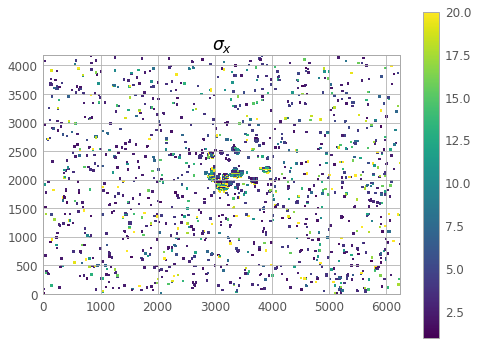

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_41790/2408286631.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


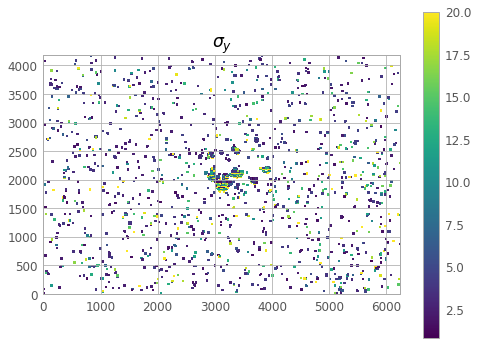

/var/folders/f6/yq2zbwvx48ngrtbv1qf7dgf40000gn/T/ipykernel_41790/2408286631.py:19: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


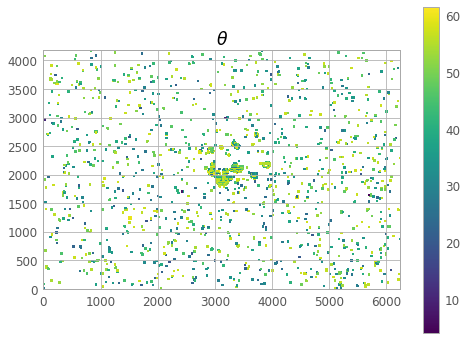

In [5]:
plt.figure()
plt.title(r'$\sigma_x$')
plt.imshow(np.abs(sigma_x_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title(r'$\sigma_y$')
plt.imshow(np.abs(sigma_y_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()

plt.figure()
plt.title(r'$\theta$')
plt.imshow(theta_map*180/np.pi, origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()
plt.show()


In [24]:
coeff = 2*np.sqrt(2*np.log(2))

# inteprolation to fill out empty spaces
shape = np.shape(sigma_map)
points = np.isnan(sigma_map)
values = np.ma.array(sigma_map, mask=np.logical_not(points))
gridcoords = np.meshgrid(range(shape[0]), range(shape[1]))
print(gridcoords[0])
outgrid = griddata(points, values, gridcoords, method='nearest')


plt.figure()
plt.title(r'$FWHH$')
plt.imshow(np.abs(coeff * sigma_map), origin='lower',
           cmap='viridis', interpolation='none')
plt.colorbar()

[[   0    1    2 ... 4173 4174 4175]
 [   0    1    2 ... 4173 4174 4175]
 [   0    1    2 ... 4173 4174 4175]
 ...
 [   0    1    2 ... 4173 4174 4175]
 [   0    1    2 ... 4173 4174 4175]
 [   0    1    2 ... 4173 4174 4175]]


ValueError: number of dimensions in xi does not match x

(array([4.00000e+00, 5.00000e+01, 2.61400e+03, 9.57700e+03, 8.38239e+05,
        5.99716e+05, 1.31015e+05, 1.68166e+05, 1.77494e+05, 1.92294e+05]),
 array([-13.21447659,  -9.89302893,  -6.57158127,  -3.25013361,
          0.07131405,   3.3927617 ,   6.71420936,  10.03565702,
         13.35710468,  16.67855234,  20.        ]),
 <BarContainer object of 10 artists>)

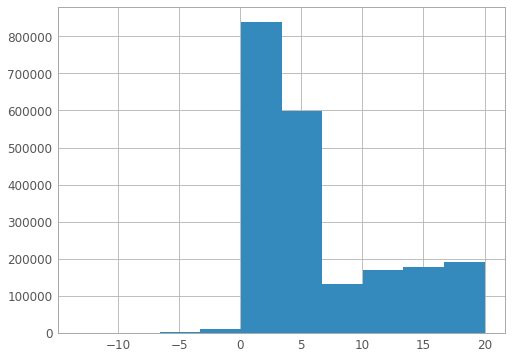

In [33]:
tmp = [x for x in sigma_y_map.flatten() if x is not np.nan]
plt.figure()
plt.hist(tmp, bins=10)